In [10]:
import numpy as np
from gasp import responses, simulation, dataset

In [11]:
width = 256
height = 256
alpha = np.deg2rad(30)
gradient = 4 * np.pi
phantom_type = 'block'

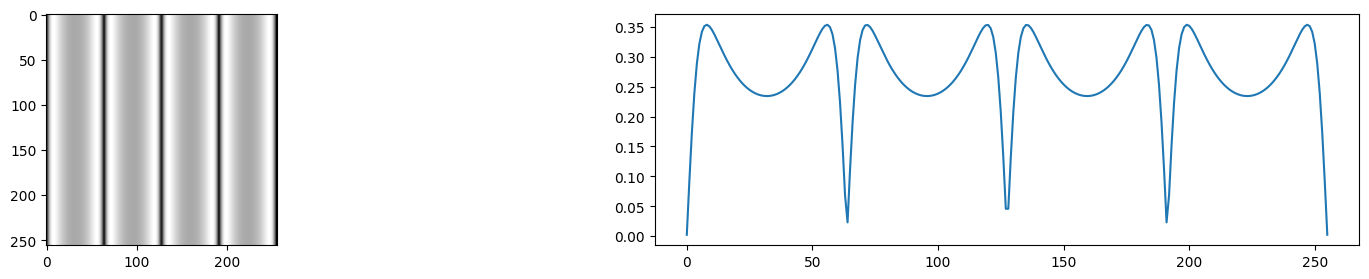

In [12]:
M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type)
simulation.view_gasp_input(M)

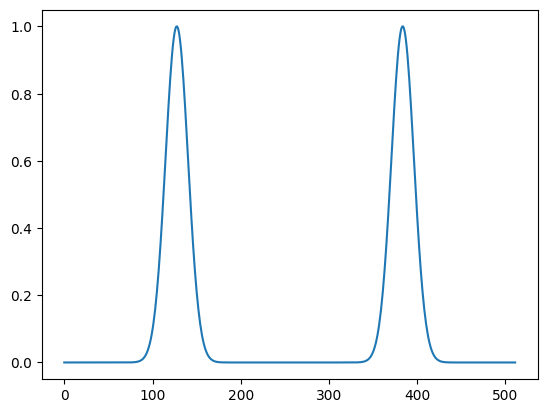

In [13]:
import matplotlib.pyplot as plt
d = responses.gaussian(width, bw=0.2, shift=0)
d = responses.make_periodic(d, 2)
plt.plot(d)

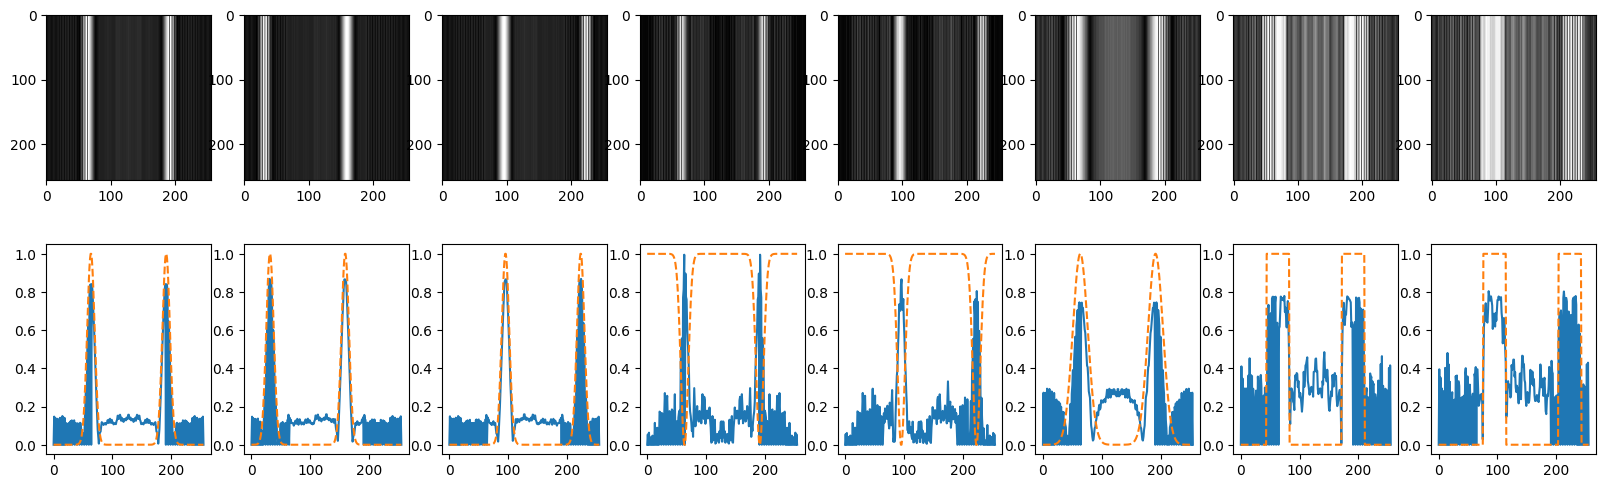

In [14]:
D = []
d_length = int(width / 2)
D.append(responses.gaussian(d_length, bw=0.2, shift=0))
D.append(responses.gaussian(d_length, bw=0.2, shift=-0.25))
D.append(responses.gaussian(d_length, bw=0.2, shift=0.25))
D.append(responses.notch(d_length, bw=0.2, shift=0))
D.append(responses.notch(d_length, bw=0.2, shift=0.25))
D.append(responses.gaussian(d_length, bw=0.4, shift=0))
D.append(responses.square(d_length, bw=0.3, shift=0))
D.append(responses.square(d_length, bw=0.3, shift=0.25))

for i in range(len(D)):
    D[i] = responses.make_periodic(D[i], 2)

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

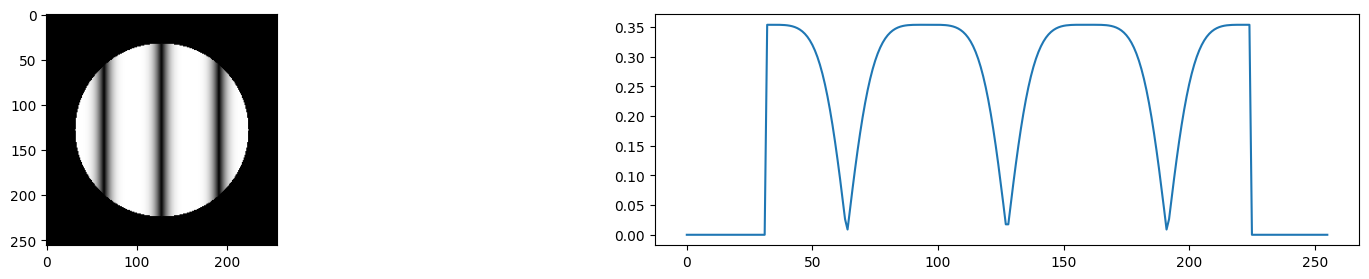

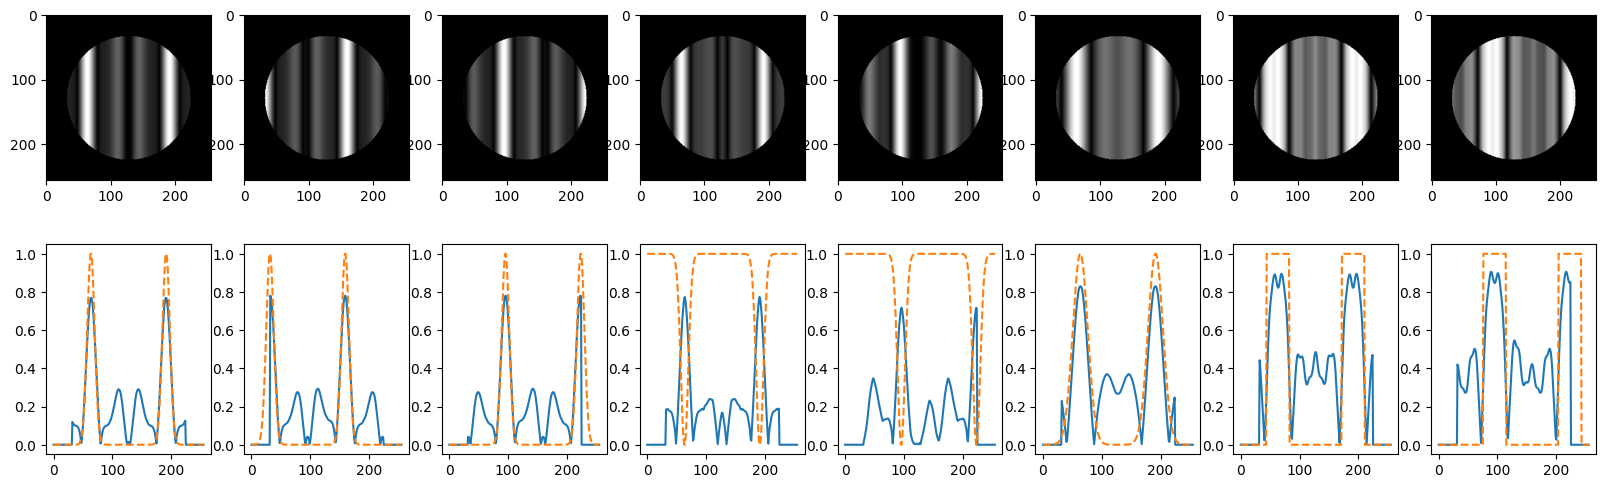

In [20]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(70)
gradient = 4 * np.pi
phantom_type = 'circle'

M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type)
simulation.view_gasp_input(M)

I = []
M = np.reshape(M,(M.shape[0], M.shape[0], -1))
for An in A:
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

simulation.view_gasp_comparison(I, D)

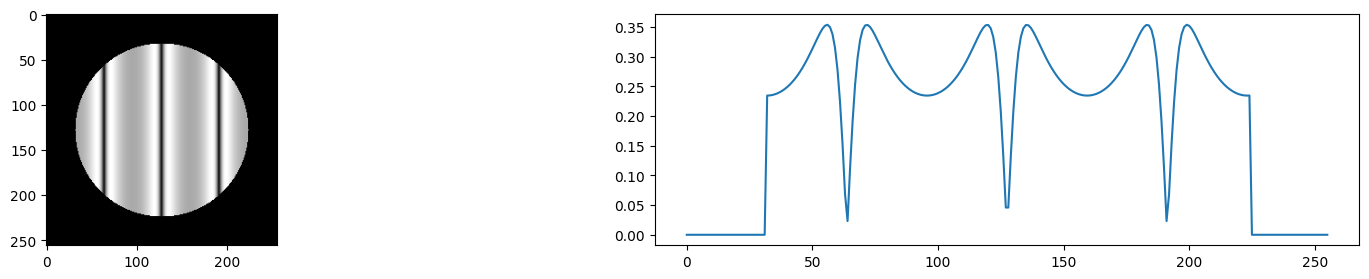

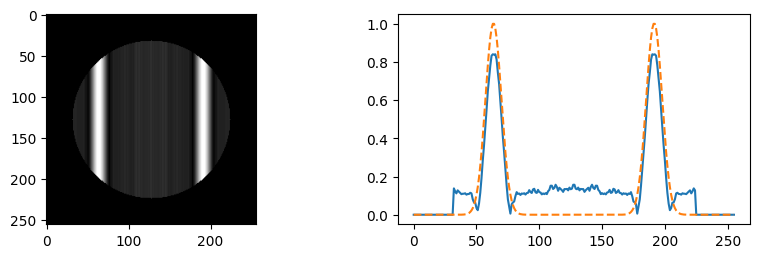

In [16]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(30)
gradient = 4 * np.pi
phantom_type = 'circle'

M = simulation.simulate_ssfp(alpha = alpha, gradient = gradient, phantom_type=phantom_type)
simulation.view_gasp_input(M)

M = np.reshape(M,(M.shape[0], M.shape[0], -1))
I = simulation.evaluate_gasp(M, A[0][0])

simulation.view_gasp(I, D[0])

In [17]:
M = dataset.load_dataset0()
print(M.shape)
M = np.reshape(M, (M.shape[0], M.shape[1], M.shape[2], -1))
print(M.shape)

Data: 20190401_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 4, 16, 3)
(128, 128, 4, 48)


In [22]:
Mn = M[:,:,0,:]
I = simulation.evaluate_gasp(Mn, A[0][0])
simulation.view_gasp(I, D[0])

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [19]:
a = np.array([1,2,3])
np.tile(a,(2))

array([1, 2, 3, 1, 2, 3])